In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler

# load the dataset
df = pd.read_csv("test.csv")

# check the first few rows
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [3]:
print("Missing values:\n", df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Missing values:
 Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction           

In [4]:
print(df.columns.tolist())

df = df.drop(columns=['Unnamed: 0', 'id'])

print(df.columns.tolist())

df_new = df.copy()


['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']
['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


In [5]:
# fill missing 'Arrival Delay in Minutes' column values with the mean value 
df_new['Arrival Delay in Minutes'] = df_new['Arrival Delay in Minutes'].fillna(df_new['Arrival Delay in Minutes'].mean()) 

# Gender: Female = 1, Male = 0
df_new['Gender'] = df_new['Gender'].replace({'Female': 1, 'Male': 0}).astype(int)
# print(df_new['Gender'].head(10).to_list())

# Customer Type: Loyal Customer = 1, disoyal Customer = 0
df_new['Customer Type'] = df_new['Customer Type'].replace({'Loyal Customer': 1, 'disloyal Customer': 0}).astype(int)
# print(df_new['Customer Type'].head(10).to_list())

# Type of Travel: Business travel = 1, Personal Travel = 0
df_new['Type of Travel'] = df_new['Type of Travel'].replace({'Business travel': 1, 'Personal Travel': 0}).astype(int)
# print(df_new['Type of Travel'].head(30).to_list())

# satisfaction: satisfied = 1, neutral or dissatisfied = 0
df_new['satisfaction'] = df_new['satisfaction'].replace({'satisfied': 1, 'neutral or dissatisfied': 0}).astype(int)
# print(df_new['satisfaction'].head(30).to_list())

# Class: Business = (1, 0), Eco = (0, 1), Other = (0, 0)
df_new['Class Business'] = (df_new['Class'] == 'Business').astype(int)
df_new['Class Eco'] = (df_new['Class'] == 'Eco').astype(int)
df_new = df_new.drop(columns=['Class'])
# print(df_new.columns.tolist())



In [6]:
# scale numeric features 
scaler = StandardScaler()
y = df_new['satisfaction']
X = df_new.drop(columns=['satisfaction'])
X_scaled = scaler.fit_transform(X)

In [7]:
# split into training, validation, and test sets 
from sklearn.model_selection import train_test_split
# training data 80%, testing data 20%
X_train, X_testing, y_train, y_testing = train_test_split(X_scaled, y, train_size=0.8, random_state=42, shuffle=True)
# validation and test data is 10% each
X_val, X_test, y_val, y_test = train_test_split(X_testing, y_testing, train_size=0.5, random_state=42, shuffle=True)

In [8]:
# print(df_new.columns.tolist())
# print(X_train[:20])

In [9]:
# store feature names
features = X.columns.to_list()
print(features)

['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Class Business', 'Class Eco']


In [10]:
# SVM Model -- this is just the linear svm using C = 1
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score 

# baseline svm using linear kernal and C = 1
# train the model using training data
base_svm = SVC(kernel='linear', C=1.0, random_state=42)
base_svm.fit(X_train, y_train)

# predict using training data
y_train_hat = base_svm.predict(X_train)

# predict using validation data
y_val_hat = base_svm.predict(X_val)

# accuracy
train_accuracy = accuracy_score(y_train, y_train_hat)
val_accuracy = accuracy_score(y_val, y_val_hat)

print('Training Accuracy = {0:f}'.format(train_accuracy))
print('Validation Accuracy = {0:f}'.format(val_accuracy))

# precision
train_precision = precision_score(y_train, y_train_hat)
val_precision = precision_score(y_val, y_val_hat)

print('Training Precision = {0:f}'.format(train_precision))
print('Validation Precision = {0:f}'.format(val_precision))

# recall
train_recall = recall_score(y_train, y_train_hat)
val_recall = recall_score(y_val, y_val_hat)

print('Training Recall = {0:f}'.format(train_recall))
print('Validation Recall = {0:f}'.format(val_recall))


Training Accuracy = 0.875409
Validation Accuracy = 0.871440
Training Precision = 0.879935
Validation Precision = 0.865932
Training Recall = 0.830420
Validation Recall = 0.833775


In [ ]:
train_accuracy_list = []
val_accuracy_list = []
train_precision_list = []
val_precision_list = []
train_recall_list = []
val_recall_list = []

c_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] # using C = 1000 is super slow (took ~45 mins) for linear svm to finish processing

for c in c_vals:
    print('C Value: {0:}'.format(c))

    base_svm = SVC(kernel='linear', C=c, random_state=42)
    base_svm.fit(X_train, y_train)

    # predict using training data
    y_train_hat = base_svm.predict(X_train)

    # predict using validation data
    y_val_hat = base_svm.predict(X_val)

    # accuracy
    train_accuracy = accuracy_score(y_train, y_train_hat)
    train_accuracy_list.append(train_accuracy)
    val_accuracy = accuracy_score(y_val, y_val_hat)
    val_accuracy_list.append(val_accuracy)

    print('Training Accuracy = {0:f}'.format(train_accuracy))
    print('Validation Accuracy = {0:f}'.format(val_accuracy))

    # precision
    train_precision = precision_score(y_train, y_train_hat)
    train_precision_list.append(train_precision)
    val_precision = precision_score(y_val, y_val_hat)
    val_precision_list.append(val_precision)

    print('Training Precision = {0:f}'.format(train_precision))
    print('Validation Precision = {0:f}'.format(val_precision))

    # recall
    train_recall = recall_score(y_train, y_train_hat)
    train_recall_list.append(train_recall)
    val_recall = recall_score(y_val, y_val_hat)
    val_recall_list.append(val_recall)

    print('Training Recall = {0:f}'.format(train_recall))
    print('Validation Recall = {0:f}'.format(val_recall))


C Value: 0.0001
Training Accuracy = 0.859817
Validation Accuracy = 0.854119
Training Precision = 0.875889
Validation Precision = 0.862235
Training Recall = 0.794253
Validation Recall = 0.791335
C Value: 0.001
Training Accuracy = 0.873340
Validation Accuracy = 0.870670
Training Precision = 0.881644
Validation Precision = 0.870457
Training Recall = 0.822880
Validation Recall = 0.825818
C Value: 0.01
Training Accuracy = 0.875072
Validation Accuracy = 0.871440
Training Precision = 0.880897
Validation Precision = 0.867959
Training Recall = 0.828344
Validation Recall = 0.831123
C Value: 0.1
Training Accuracy = 0.875746
Validation Accuracy = 0.871440
Training Precision = 0.880737
Validation Precision = 0.865932
Training Recall = 0.830310
Validation Recall = 0.833775
C Value: 1
Training Accuracy = 0.875313
Validation Accuracy = 0.871440
Training Precision = 0.879819
Validation Precision = 0.865932
Training Recall = 0.830310
Validation Recall = 0.833775
C Value: 10
Training Accuracy = 0.875409


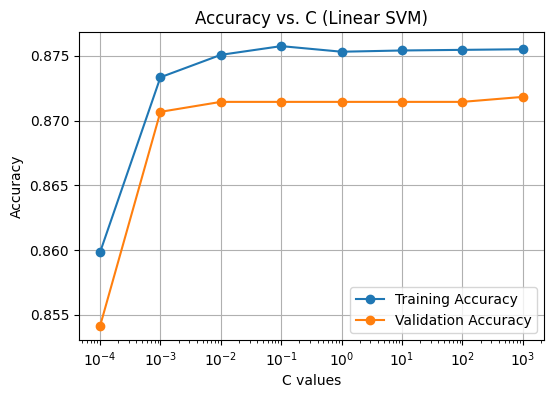

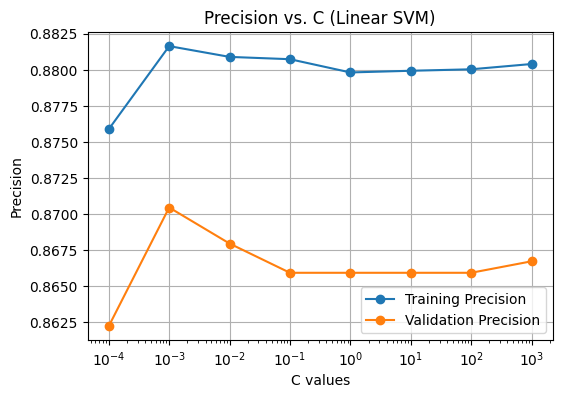

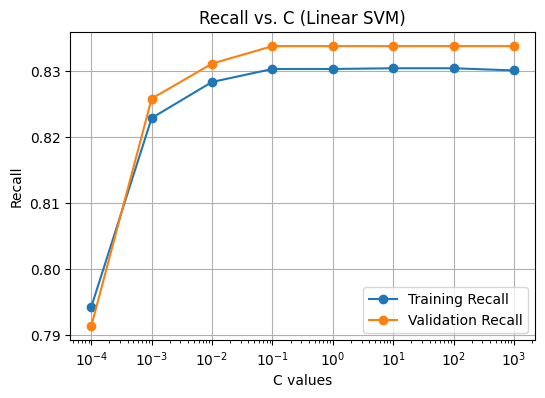

In [86]:
# plot accuracy
plt.figure(figsize=(6, 4))
plt.plot(c_vals, train_accuracy_list, marker='o', label='Training Accuracy')
plt.plot(c_vals, val_accuracy_list, marker='o', label='Validation Accuracy')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C (Linear SVM)')
plt.grid()
plt.legend()
plt.show()

# plot precision
plt.figure(figsize=(6, 4))
plt.plot(c_vals, train_precision_list, marker='o', label='Training Precision')
plt.plot(c_vals, val_precision_list, marker='o', label='Validation Precision')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Precision')
plt.title('Precision vs. C (Linear SVM)')
plt.grid()
plt.legend()
plt.show()

# plot recall
plt.figure(figsize=(6, 4))
plt.plot(c_vals, train_recall_list, marker='o', label='Training Recall')
plt.plot(c_vals, val_recall_list, marker='o', label='Validation Recall')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Recall')
plt.title('Recall vs. C (Linear SVM)')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# SVM with polynomial kernel using degree 2
train_accuracy_list_p2 = []
val_accuracy_list_p2 = []
train_precision_list_p2 = []
val_precision_list_p2 = []
train_recall_list_p2 = []
val_recall_list_p2 = []

c_vals_p2 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in c_vals_p2:
    print('C Value: {0:}'.format(c))

    # train polynomail kernal with degree 2
    svm_p2 = SVC(kernel='poly', degree=2, C=c, random_state=42)
    svm_p2.fit(X_train, y_train)

    y_train_hat_p2 = svm_p2.predict(X_train)
    y_val_hat_p2 = svm_p2.predict(X_val)

    # accuracy
    train_accuracy_p2 = accuracy_score(y_train, y_train_hat_p2)
    train_accuracy_list_p2.append(train_accuracy_p2)
    val_accuracy_p2 = accuracy_score(y_val, y_val_hat_p2)
    val_accuracy_list_p2.append(val_accuracy_p2)

    print('Training Accuracy = {0:f}'.format(train_accuracy_p2))
    print('Validation Accuracy = {0:f}'.format(val_accuracy_p2))

    # precision 
    train_precision_p2 = precision_score(y_train, y_train_hat_p2, zero_division=0) # in case of division by 0
    train_precision_list_p2.append(train_precision_p2)
    val_precision_p2 = precision_score(y_val, y_val_hat_p2, zero_division=0)
    val_precision_list_p2.append(val_precision_p2)

    print('Training Precision = {0:f}'.format(train_precision_p2))
    print('Validation Precision = {0:f}'.format(val_precision_p2))

    # recall
    train_recall_p2 = recall_score(y_train, y_train_hat_p2)
    train_recall_list_p2.append(train_recall_p2)
    val_recall_p2 = recall_score(y_val, y_val_hat_p2)
    val_recall_list_p2.append(val_recall_p2)

    print('Training Recall = {0:f}'.format(train_recall_p2))
    print('Validation Recall = {0:f}'.format(val_recall_p2))



C Value: 0.0001
Training Accuracy = 0.559577
Validation Accuracy = 0.564665
Training Precision = 0.000000
Validation Precision = 0.000000
Training Recall = 0.000000
Validation Recall = 0.000000
C Value: 0.001
Training Accuracy = 0.560635
Validation Accuracy = 0.565820
Training Precision = 1.000000
Validation Precision = 1.000000
Training Recall = 0.002404
Validation Recall = 0.002653
C Value: 0.01
Training Accuracy = 0.832964
Validation Accuracy = 0.824480
Training Precision = 0.941964
Validation Precision = 0.935484
Training Recall = 0.661495
Validation Recall = 0.641026
C Value: 0.1
Training Accuracy = 0.914629
Validation Accuracy = 0.915704
Training Precision = 0.926573
Validation Precision = 0.930189
Training Recall = 0.875546
Validation Recall = 0.871795
C Value: 1
Training Accuracy = 0.929163
Validation Accuracy = 0.927637
Training Precision = 0.931558
Validation Precision = 0.922870
Training Recall = 0.905704
Validation Recall = 0.909814
C Value: 10
Training Accuracy = 0.934456


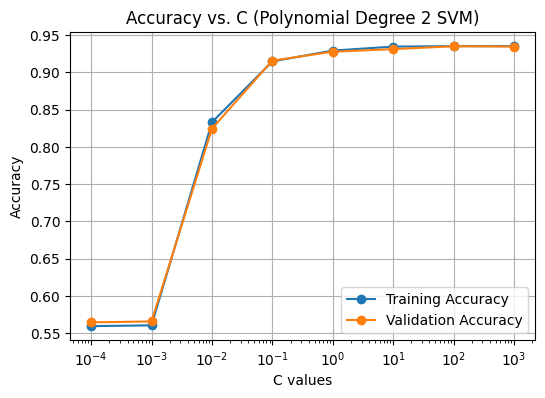

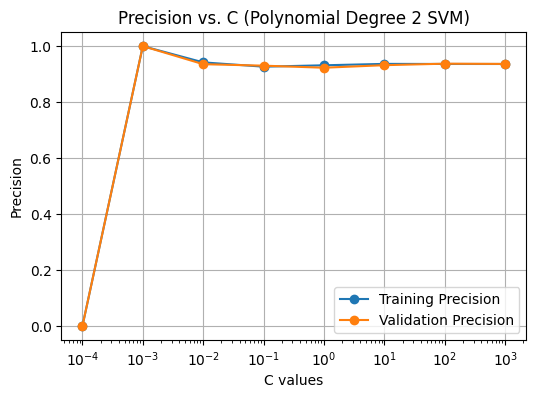

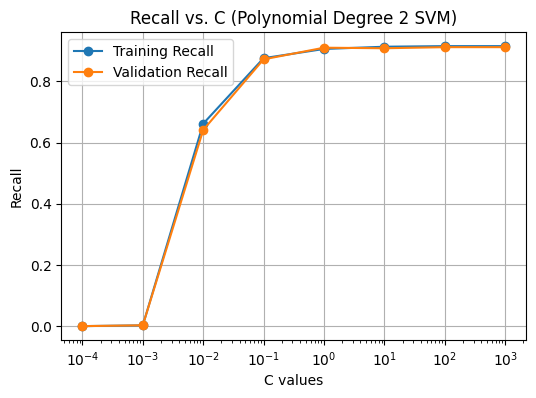

In [87]:
# plot accuracy
plt.figure(figsize=(6, 4))
plt.plot(c_vals_p2, train_accuracy_list_p2, marker='o', label='Training Accuracy')
plt.plot(c_vals_p2, val_accuracy_list_p2, marker='o', label='Validation Accuracy')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C (Polynomial Degree 2 SVM)')
plt.grid()
plt.legend()
plt.show()

# plot precision
plt.figure(figsize=(6, 4))
plt.plot(c_vals_p2, train_precision_list_p2, marker='o', label='Training Precision')
plt.plot(c_vals_p2, val_precision_list_p2, marker='o', label='Validation Precision')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Precision')
plt.title('Precision vs. C (Polynomial Degree 2 SVM)')
plt.grid()
plt.legend()
plt.show()

# plot recall
plt.figure(figsize=(6, 4))
plt.plot(c_vals_p2, train_recall_list_p2, marker='o', label='Training Recall')
plt.plot(c_vals_p2, val_recall_list_p2, marker='o', label='Validation Recall')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Recall')
plt.title('Recall vs. C (Polynomial Degree 2 SVM)')
plt.grid()
plt.legend()
plt.show()

In [73]:
# SVM with polynomial kernel using degree 3
train_accuracy_list_p3 = []
val_accuracy_list_p3 = []
train_precision_list_p3 = []
val_precision_list_p3 = []
train_recall_list_p3 = []
val_recall_list_p3 = []

c_vals_p3 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in c_vals_p3:
    print('C Value: {0:}'.format(c))

    # train polynomail kernal with degree 3
    svm_p3 = SVC(kernel='poly', degree=3, C=c, random_state=42)
    svm_p3.fit(X_train, y_train)

    y_train_hat_p3 = svm_p3.predict(X_train)
    y_val_hat_p3 = svm_p3.predict(X_val)

    # accuracy
    train_accuracy_p3 = accuracy_score(y_train, y_train_hat_p3)
    train_accuracy_list_p3.append(train_accuracy_p3)
    val_accuracy_p3 = accuracy_score(y_val, y_val_hat_p3)
    val_accuracy_list_p3.append(val_accuracy_p3)

    print('Training Accuracy = {0:f}'.format(train_accuracy_p3))
    print('Validation Accuracy = {0:f}'.format(val_accuracy_p3))

    # precision 
    train_precision_p3 = precision_score(y_train, y_train_hat_p3, zero_division=0)
    train_precision_list_p3.append(train_precision_p3)
    val_precision_p3 = precision_score(y_val, y_val_hat_p3, zero_division=0)
    val_precision_list_p3.append(val_precision_p3)

    print('Training Precision = {0:f}'.format(train_precision_p3))
    print('Validation Precision = {0:f}'.format(val_precision_p3))

    # recall
    train_recall_p3 = recall_score(y_train, y_train_hat_p3)
    train_recall_list_p3.append(train_recall_p3)
    val_recall_p3 = recall_score(y_val, y_val_hat_p3)
    val_recall_list_p3.append(val_recall_p3)

    print('Training Recall = {0:f}'.format(train_recall_p3))
    print('Validation Recall = {0:f}'.format(val_recall_p3))

C Value: 0.0001
Training Accuracy = 0.559625
Validation Accuracy = 0.564665
Training Precision = 1.000000
Validation Precision = 0.000000
Training Recall = 0.000109
Validation Recall = 0.000000
C Value: 0.001
Training Accuracy = 0.648171
Validation Accuracy = 0.652040
Training Precision = 0.996226
Validation Precision = 0.995633
Training Recall = 0.201923
Validation Recall = 0.201592
C Value: 0.01
Training Accuracy = 0.878056
Validation Accuracy = 0.868745
Training Precision = 0.950082
Validation Precision = 0.941834
Training Recall = 0.763221
Validation Recall = 0.744474
C Value: 0.1
Training Accuracy = 0.917565
Validation Accuracy = 0.908006
Training Precision = 0.941484
Validation Precision = 0.923954
Training Recall = 0.866696
Validation Recall = 0.859416
C Value: 1
Training Accuracy = 0.941723
Validation Accuracy = 0.924557
Training Precision = 0.949813
Validation Precision = 0.929293
Training Recall = 0.916084
Validation Recall = 0.894783
C Value: 10
Training Accuracy = 0.960828


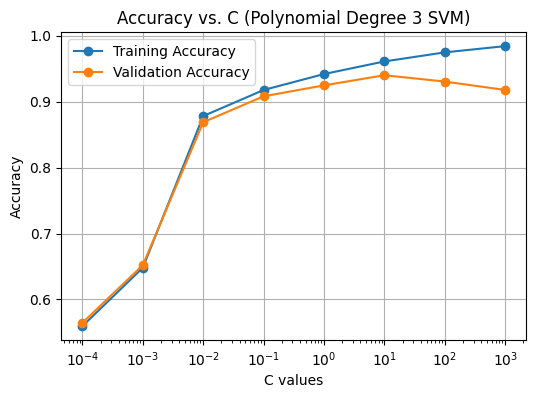

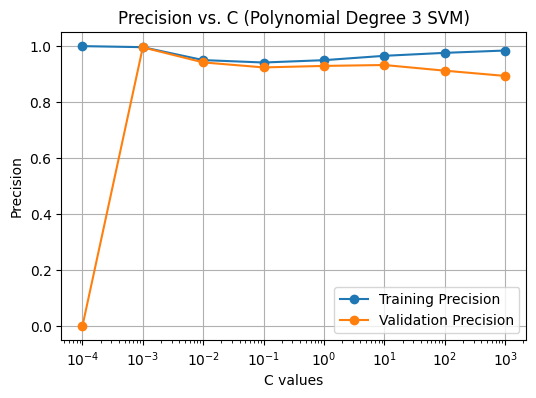

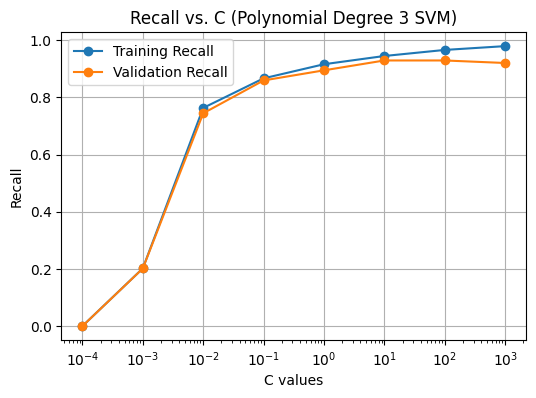

In [88]:
# plot accuracy
plt.figure(figsize=(6, 4))
plt.plot(c_vals_p3, train_accuracy_list_p3, marker='o', label='Training Accuracy')
plt.plot(c_vals_p3, val_accuracy_list_p3, marker='o', label='Validation Accuracy')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C (Polynomial Degree 3 SVM)')
plt.grid()
plt.legend()
plt.show()

# plot precision
plt.figure(figsize=(6, 4))
plt.plot(c_vals_p3, train_precision_list_p3, marker='o', label='Training Precision')
plt.plot(c_vals_p3, val_precision_list_p3, marker='o', label='Validation Precision')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Precision')
plt.title('Precision vs. C (Polynomial Degree 3 SVM)')
plt.grid()
plt.legend()
plt.show()

# plot recall
plt.figure(figsize=(6, 4))
plt.plot(c_vals_p3, train_recall_list_p3, marker='o', label='Training Recall')
plt.plot(c_vals_p3, val_recall_list_p3, marker='o', label='Validation Recall')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Recall')
plt.title('Recall vs. C (Polynomial Degree 3 SVM)')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# SVM with rbf kernel
train_accuracy_list_rbf = []
val_accuracy_list_rbf = []
train_precision_list_rbf = []
val_precision_list_rbf = []
train_recall_list_rbf = []
val_recall_list_rbf = []

c_vals_rbf = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in c_vals_rbf:
    print('C Value: {0:}'.format(c))

    # train rbf model
    svm_rbf = SVC(kernel='rbf', C=c, random_state=42) # using the default gamma value (gamma=scale)
    svm_rbf.fit(X_train, y_train)

    y_train_hat_rbf = svm_rbf.predict(X_train)
    y_val_hat_rbf = svm_rbf.predict(X_val)

    # accuracy
    train_accuracy_rbf = accuracy_score(y_train, y_train_hat_rbf)
    train_accuracy_list_rbf.append(train_accuracy_rbf)
    val_accuracy_rbf = accuracy_score(y_val, y_val_hat_rbf)
    val_accuracy_list_rbf.append(val_accuracy_rbf)

    print('Training Accuracy = {0:f}'.format(train_accuracy_rbf))
    print('Validation Accuracy = {0:f}'.format(val_accuracy_rbf))

    # precision 
    train_precision_rbf = precision_score(y_train, y_train_hat_rbf, zero_division=0)
    train_precision_list_rbf.append(train_precision_rbf)
    val_precision_rbf = precision_score(y_val, y_val_hat_rbf, zero_division=0)
    val_precision_list_rbf.append(val_precision_rbf)

    print('Training Precision = {0:f}'.format(train_precision_rbf))
    print('Validation Precision = {0:f}'.format(val_precision_rbf))

    # recall
    train_recall_rbf = recall_score(y_train, y_train_hat_rbf)
    train_recall_list_rbf.append(train_recall_rbf)
    val_recall_rbf = recall_score(y_val, y_val_hat_rbf)
    val_recall_list_rbf.append(val_recall_rbf)

    print('Training Recall = {0:f}'.format(train_recall_rbf))
    print('Validation Recall = {0:f}'.format(val_recall_rbf))

C Value: 0.0001
Training Accuracy = 0.559577
Validation Accuracy = 0.564665
Training Precision = 0.000000
Validation Precision = 0.000000
Training Recall = 0.000000
Validation Recall = 0.000000
C Value: 0.001
Training Accuracy = 0.816362
Validation Accuracy = 0.818322
Training Precision = 0.933117
Validation Precision = 0.930719
Training Recall = 0.628059
Validation Recall = 0.629531
C Value: 0.01
Training Accuracy = 0.888547
Validation Accuracy = 0.884527
Training Precision = 0.934971
Validation Precision = 0.925281
Training Recall = 0.802775
Validation Recall = 0.799293
C Value: 0.1
Training Accuracy = 0.929885
Validation Accuracy = 0.923788
Training Precision = 0.940268
Validation Precision = 0.932345
Training Recall = 0.897837
Validation Recall = 0.889478
C Value: 1
Training Accuracy = 0.955486
Validation Accuracy = 0.943418
Training Precision = 0.959352
Validation Precision = 0.941652
Training Recall = 0.938702
Validation Recall = 0.927498
C Value: 10
Training Accuracy = 0.978008


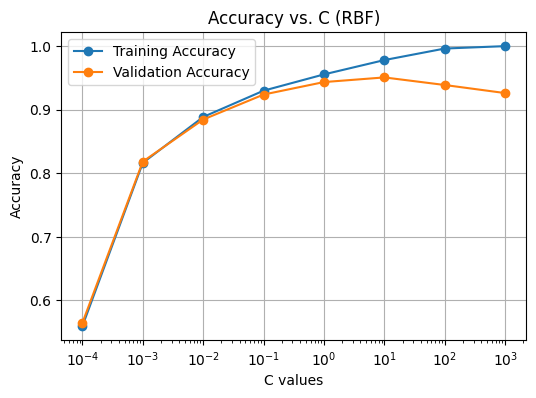

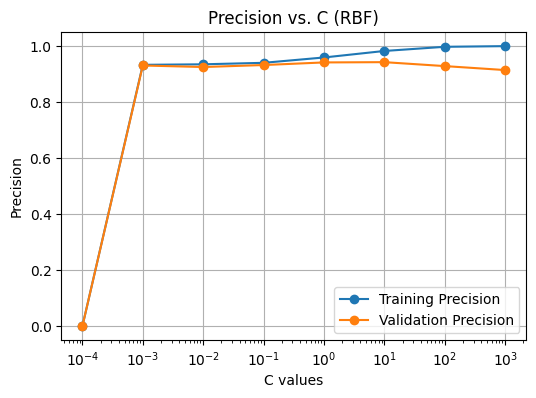

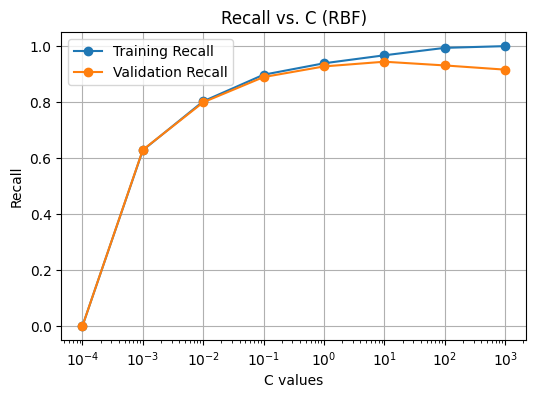

In [89]:
# plot accuracy
plt.figure(figsize=(6, 4))
plt.plot(c_vals_rbf, train_accuracy_list_rbf, marker='o', label='Training Accuracy')
plt.plot(c_vals_rbf, val_accuracy_list_rbf, marker='o', label='Validation Accuracy')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C (RBF)')
plt.grid()
plt.legend()
plt.show()

# plot precision
plt.figure(figsize=(6, 4))
plt.plot(c_vals_rbf, train_precision_list_rbf, marker='o', label='Training Precision')
plt.plot(c_vals_rbf, val_precision_list_rbf, marker='o', label='Validation Precision')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Precision')
plt.title('Precision vs. C (RBF)')
plt.grid()
plt.legend()
plt.show()

# plot recall
plt.figure(figsize=(6, 4))
plt.plot(c_vals_rbf, train_recall_list_rbf, marker='o', label='Training Recall')
plt.plot(c_vals_rbf, val_recall_list_rbf, marker='o', label='Validation Recall')
plt.xscale('log') # to space values out
plt.xlabel('C values')
plt.ylabel('Recall')
plt.title('Recall vs. C (RBF)')
plt.grid()
plt.legend()
plt.show()

In [93]:
from sklearn.neural_network import MLPClassifier

train_accuracy_list_nn = []
val_accuracy_list_nn = []
train_precision_list_nn = []
val_precision_list_nn = []
train_recall_list_nn = []
val_recall_list_nn = []

alpha_vals = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for alpha in alpha_vals:
    print('Alpha Value: {0:}'.format(alpha))

    # baseline neural network (one hidden layer + varying degrees of L2 regularization)
    base_nn = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam', alpha=alpha, max_iter=1000, random_state=42)
    base_nn.fit(X_train, y_train)

    y_train_hat_nn = base_nn.predict(X_train)
    y_val_hat_nn = base_nn.predict(X_val)

    # accuracy 
    train_accuracy_nn = accuracy_score(y_train, y_train_hat_nn)
    train_accuracy_list_nn.append(train_accuracy_nn)
    val_accuracy_nn = accuracy_score(y_val, y_val_hat_nn)
    val_accuracy_list_nn.append(val_accuracy_nn)
    print('Training Accuracy = {0:f}'.format(train_accuracy_nn))
    print('Validation Accuracy = {0:f}'.format(val_accuracy_nn))

    # precision
    train_precision_nn = precision_score(y_train, y_train_hat_nn, zero_division=0)
    train_precision_list_nn.append(train_precision_nn)
    val_precision_nn = precision_score(y_val, y_val_hat_nn, zero_division=0)
    val_precision_list_nn.append(val_precision_nn)
    print('Training Precision = {0:f}'.format(train_precision_nn))
    print('Validation Precision = {0:f}'.format(val_precision_nn))

    # recall
    train_recall_nn = recall_score(y_train, y_train_hat_nn)
    train_recall_list_nn.append(train_recall_nn)
    val_recall_nn = recall_score(y_val, y_val_hat_nn)
    val_recall_list_nn.append(val_recall_nn)

    print('Training Recall = {0:f}'.format(train_recall_nn))
    print('Validation Recall = {0:f}'.format(val_recall_nn))

Alpha Value: 0
Training Accuracy = 0.968287
Validation Accuracy = 0.942263
Training Precision = 0.967008
Validation Precision = 0.930641
Training Recall = 0.960774
Validation Recall = 0.937224
Alpha Value: 0.0001
Training Accuracy = 0.969586
Validation Accuracy = 0.942648
Training Precision = 0.966083
Validation Precision = 0.927700
Training Recall = 0.964816
Validation Recall = 0.941645
Alpha Value: 0.001
Training Accuracy = 0.967806
Validation Accuracy = 0.943033
Training Precision = 0.967795
Validation Precision = 0.933040
Training Recall = 0.958807
Validation Recall = 0.936340
Alpha Value: 0.01
Training Accuracy = 0.967806
Validation Accuracy = 0.938029
Training Precision = 0.968105
Validation Precision = 0.929204
Training Recall = 0.958479
Validation Recall = 0.928382
Alpha Value: 0.1
Training Accuracy = 0.963571
Validation Accuracy = 0.947267
Training Precision = 0.963556
Validation Precision = 0.938272
Training Recall = 0.953344
Validation Recall = 0.940760
Alpha Value: 1
Traini

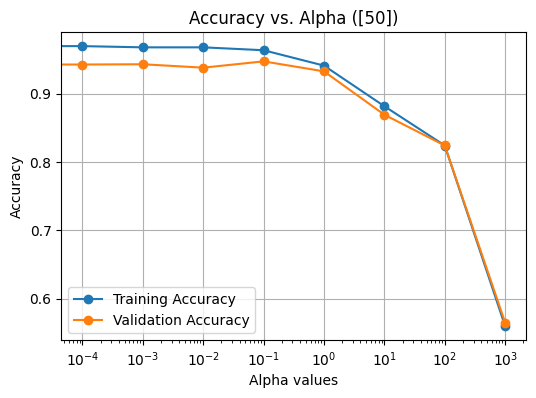

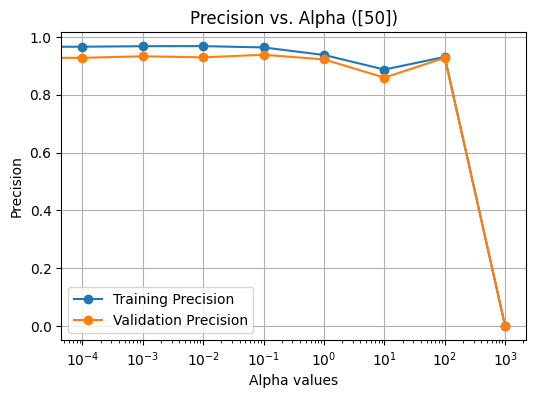

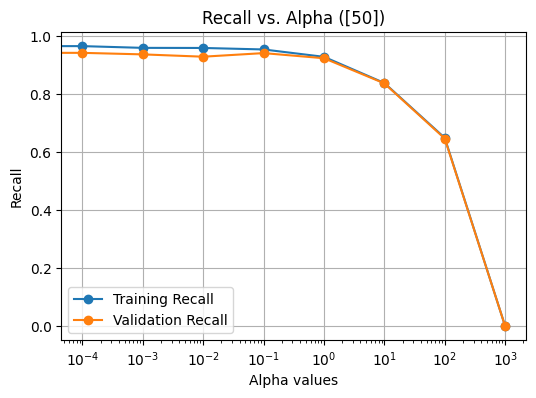

In [94]:
# plot accuracy
plt.figure(figsize=(6, 4))
plt.plot(alpha_vals, train_accuracy_list_nn, marker='o', label='Training Accuracy')
plt.plot(alpha_vals, val_accuracy_list_nn, marker='o', label='Validation Accuracy')
plt.xscale('log') # to space values out
plt.xlabel('Alpha values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Alpha ([50])')
plt.grid()
plt.legend()
plt.show()

# plot precision
plt.figure(figsize=(6, 4))
plt.plot(alpha_vals, train_precision_list_nn, marker='o', label='Training Precision')
plt.plot(alpha_vals, val_precision_list_nn, marker='o', label='Validation Precision')
plt.xscale('log') # to space values out
plt.xlabel('Alpha values')
plt.ylabel('Precision')
plt.title('Precision vs. Alpha ([50])')
plt.grid()
plt.legend()
plt.show()

# plot recall
plt.figure(figsize=(6, 4))
plt.plot(alpha_vals, train_recall_list_nn, marker='o', label='Training Recall')
plt.plot(alpha_vals, val_recall_list_nn, marker='o', label='Validation Recall')
plt.xscale('log') # to space values out
plt.xlabel('Alpha values')
plt.ylabel('Recall')
plt.title('Recall vs. Alpha ([50])')
plt.grid()
plt.legend()
plt.show()

In [95]:
train_accuracy_list_nn2 = []
val_accuracy_list_nn2 = []
train_precision_list_nn2 = []
val_precision_list_nn2 = []
train_recall_list_nn2 = []
val_recall_list_nn2 = []

alpha_vals_2 = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for alpha in alpha_vals_2:
    print('Alpha Value: {0:}'.format(alpha))

    # neural network with two hidden layers + varying degrees of L2 regularization 
    nn_h2 = MLPClassifier(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', alpha=alpha, max_iter=1000, random_state=42)
    nn_h2.fit(X_train, y_train)

    y_train_hat_nn2 = nn_h2.predict(X_train)
    y_val_hat_nn2 = nn_h2.predict(X_val)

    # accuracy 
    train_accuracy_nn2 = accuracy_score(y_train, y_train_hat_nn2)
    train_accuracy_list_nn2.append(train_accuracy_nn2)
    val_accuracy_nn2 = accuracy_score(y_val, y_val_hat_nn2)
    val_accuracy_list_nn2.append(val_accuracy_nn2)
    print('Training Accuracy = {0:f}'.format(train_accuracy_nn2))
    print('Validation Accuracy = {0:f}'.format(val_accuracy_nn2))

    # precision
    train_precision_nn2 = precision_score(y_train, y_train_hat_nn2, zero_division=0)
    train_precision_list_nn2.append(train_precision_nn2)
    val_precision_nn2 = precision_score(y_val, y_val_hat_nn2, zero_division=0)
    val_precision_list_nn2.append(val_precision_nn2)
    print('Training Precision = {0:f}'.format(train_precision_nn2))
    print('Validation Precision = {0:f}'.format(val_precision_nn2))

    # recall
    train_recall_nn2 = recall_score(y_train, y_train_hat_nn2)
    train_recall_list_nn2.append(train_recall_nn2)
    val_recall_nn2 = recall_score(y_val, y_val_hat_nn2)
    val_recall_list_nn2.append(val_recall_nn2)

    print('Training Recall = {0:f}'.format(train_recall_nn2))
    print('Validation Recall = {0:f}'.format(val_recall_nn2))

Alpha Value: 0
Training Accuracy = 0.989846
Validation Accuracy = 0.948037
Training Precision = 0.994251
Validation Precision = 0.939153
Training Recall = 0.982627
Validation Recall = 0.941645
Alpha Value: 0.0001
Training Accuracy = 0.988065
Validation Accuracy = 0.938414
Training Precision = 0.983388
Validation Precision = 0.916738
Training Recall = 0.989620
Validation Recall = 0.944297
Alpha Value: 0.001
Training Accuracy = 0.989124
Validation Accuracy = 0.941109
Training Precision = 0.990547
Validation Precision = 0.929701
Training Recall = 0.984703
Validation Recall = 0.935455
Alpha Value: 0.01
Training Accuracy = 0.987873
Validation Accuracy = 0.940339
Training Precision = 0.987084
Validation Precision = 0.923611
Training Recall = 0.985358
Validation Recall = 0.940760
Alpha Value: 0.1
Training Accuracy = 0.975120
Validation Accuracy = 0.956120
Training Precision = 0.985494
Validation Precision = 0.956873
Training Recall = 0.957605
Validation Recall = 0.941645
Alpha Value: 1
Traini

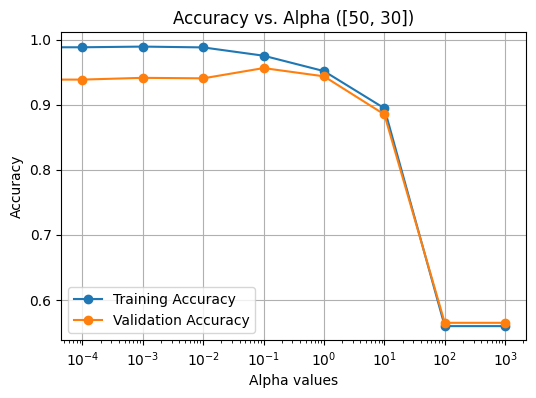

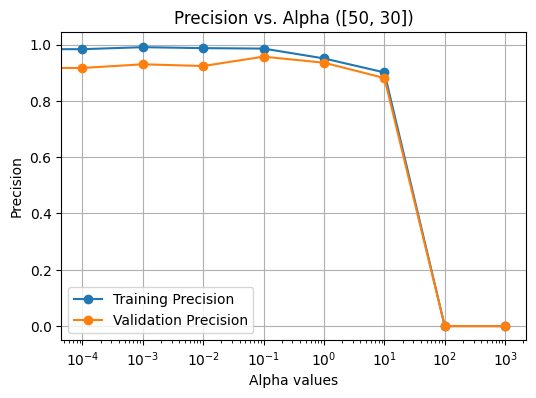

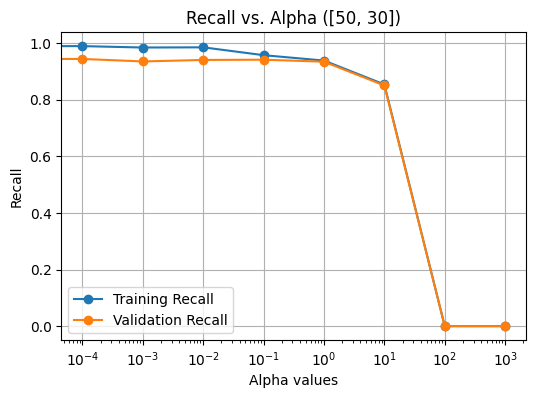

In [96]:
# plot accuracy
plt.figure(figsize=(6, 4))
plt.plot(alpha_vals_2, train_accuracy_list_nn2, marker='o', label='Training Accuracy')
plt.plot(alpha_vals_2, val_accuracy_list_nn2, marker='o', label='Validation Accuracy')
plt.xscale('log') # to space values out
plt.xlabel('Alpha values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Alpha ([50, 30])')
plt.grid()
plt.legend()
plt.show()

# plot precision
plt.figure(figsize=(6, 4))
plt.plot(alpha_vals_2, train_precision_list_nn2, marker='o', label='Training Precision')
plt.plot(alpha_vals_2, val_precision_list_nn2, marker='o', label='Validation Precision')
plt.xscale('log') # to space values out
plt.xlabel('Alpha values')
plt.ylabel('Precision')
plt.title('Precision vs. Alpha ([50, 30])')
plt.grid()
plt.legend()
plt.show()

# plot recall
plt.figure(figsize=(6, 4))
plt.plot(alpha_vals_2, train_recall_list_nn2, marker='o', label='Training Recall')
plt.plot(alpha_vals_2, val_recall_list_nn2, marker='o', label='Validation Recall')
plt.xscale('log') # to space values out
plt.xlabel('Alpha values')
plt.ylabel('Recall')
plt.title('Recall vs. Alpha ([50, 30])')
plt.grid()
plt.legend()
plt.show()

In [97]:
train_accuracy_list_nn3 = []
val_accuracy_list_nn3 = []
train_precision_list_nn3 = []
val_precision_list_nn3 = []
train_recall_list_nn3 = []
val_recall_list_nn3 = []

alpha_vals_3 = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for alpha in alpha_vals_3:
    print('Alpha Value: {0:}'.format(alpha))

    # neural network with three hidden layers + varying degrees of L2 regularization 
    nn_h3 = MLPClassifier(hidden_layer_sizes=(50, 30, 10), activation='relu', solver='adam', alpha=alpha, max_iter=1000, random_state=42)
    nn_h3.fit(X_train, y_train)

    y_train_hat_nn3 = nn_h3.predict(X_train)
    y_val_hat_nn3 = nn_h3.predict(X_val)

    # accuracy 
    train_accuracy_nn3 = accuracy_score(y_train, y_train_hat_nn3)
    train_accuracy_list_nn3.append(train_accuracy_nn3)
    val_accuracy_nn3 = accuracy_score(y_val, y_val_hat_nn3)
    val_accuracy_list_nn3.append(val_accuracy_nn3)
    print('Training Accuracy = {0:f}'.format(train_accuracy_nn3))
    print('Validation Accuracy = {0:f}'.format(val_accuracy_nn3))

    # precision
    train_precision_nn3 = precision_score(y_train, y_train_hat_nn3, zero_division=0)
    train_precision_list_nn3.append(train_precision_nn3)
    val_precision_nn3 = precision_score(y_val, y_val_hat_nn3, zero_division=0)
    val_precision_list_nn3.append(val_precision_nn3)
    print('Training Precision = {0:f}'.format(train_precision_nn3))
    print('Validation Precision = {0:f}'.format(val_precision_nn3))

    # recall
    train_recall_nn3 = recall_score(y_train, y_train_hat_nn3)
    train_recall_list_nn3.append(train_recall_nn3)
    val_recall_nn3 = recall_score(y_val, y_val_hat_nn3)
    val_recall_list_nn3.append(val_recall_nn3)

    print('Training Recall = {0:f}'.format(train_recall_nn3))
    print('Validation Recall = {0:f}'.format(val_recall_nn3))

Alpha Value: 0
Training Accuracy = 0.992637
Validation Accuracy = 0.939954
Training Precision = 0.993745
Validation Precision = 0.925764
Training Recall = 0.989510
Validation Recall = 0.937224
Alpha Value: 0.0001
Training Accuracy = 0.993985
Validation Accuracy = 0.939954
Training Precision = 0.989693
Validation Precision = 0.922078
Training Recall = 0.996722
Validation Recall = 0.941645
Alpha Value: 0.001
Training Accuracy = 0.990231
Validation Accuracy = 0.942648
Training Precision = 0.994256
Validation Precision = 0.936057
Training Recall = 0.983501
Validation Recall = 0.931919
Alpha Value: 0.01
Training Accuracy = 0.991290
Validation Accuracy = 0.940724
Training Precision = 0.996348
Validation Precision = 0.940487
Training Recall = 0.983829
Validation Recall = 0.922193
Alpha Value: 0.1
Training Accuracy = 0.985178
Validation Accuracy = 0.949192
Training Precision = 0.994410
Validation Precision = 0.946381
Training Recall = 0.971809
Validation Recall = 0.936340
Alpha Value: 1
Traini

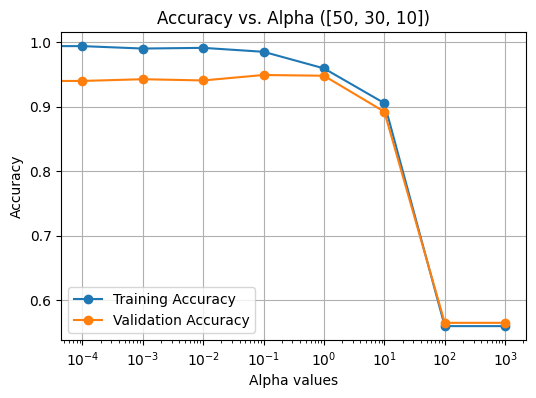

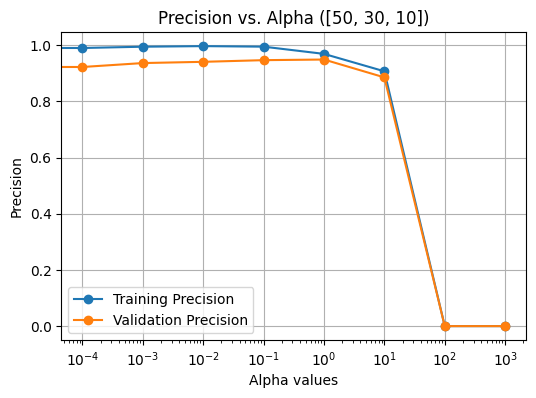

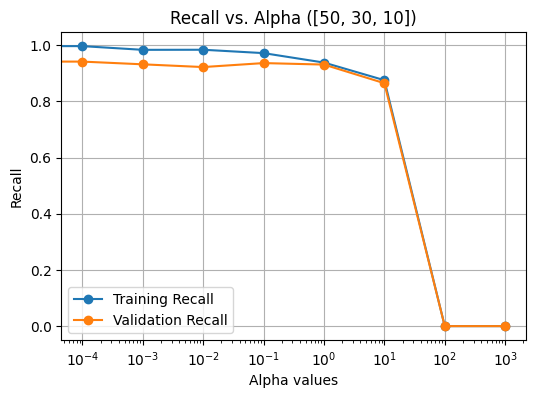

In [98]:
# plot accuracy
plt.figure(figsize=(6, 4))
plt.plot(alpha_vals_3, train_accuracy_list_nn3, marker='o', label='Training Accuracy')
plt.plot(alpha_vals_3, val_accuracy_list_nn3, marker='o', label='Validation Accuracy')
plt.xscale('log') # to space values out
plt.xlabel('Alpha values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Alpha ([50, 30, 10])')
plt.grid()
plt.legend()
plt.show()

# plot precision
plt.figure(figsize=(6, 4))
plt.plot(alpha_vals_3, train_precision_list_nn3, marker='o', label='Training Precision')
plt.plot(alpha_vals_3, val_precision_list_nn3, marker='o', label='Validation Precision')
plt.xscale('log') # to space values out
plt.xlabel('Alpha values')
plt.ylabel('Precision')
plt.title('Precision vs. Alpha ([50, 30, 10])')
plt.grid()
plt.legend()
plt.show()

# plot recall
plt.figure(figsize=(6, 4))
plt.plot(alpha_vals_3, train_recall_list_nn3, marker='o', label='Training Recall')
plt.plot(alpha_vals_3, val_recall_list_nn3, marker='o', label='Validation Recall')
plt.xscale('log') # to space values out
plt.xlabel('Alpha values')
plt.ylabel('Recall')
plt.title('Recall vs. Alpha ([50, 30, 10])')
plt.grid()
plt.legend()
plt.show()

In [99]:
train_accuracy_list_nn4 = []
val_accuracy_list_nn4 = []
train_precision_list_nn4 = []
val_precision_list_nn4 = []
train_recall_list_nn4 = []
val_recall_list_nn4 = []

alpha_vals_4 = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for alpha in alpha_vals_4:
    print('Alpha Value: {0:}'.format(alpha))

    # neural network with three hidden layers + varying degrees of L2 regularization 
    nn_h4 = MLPClassifier(hidden_layer_sizes=(90, 50, 30, 10), activation='relu', solver='adam', alpha=alpha, max_iter=1000, random_state=42)
    nn_h4.fit(X_train, y_train)

    y_train_hat_nn4 = nn_h4.predict(X_train)
    y_val_hat_nn4 = nn_h4.predict(X_val)

    # accuracy 
    train_accuracy_nn4 = accuracy_score(y_train, y_train_hat_nn4)
    train_accuracy_list_nn4.append(train_accuracy_nn4)
    val_accuracy_nn4 = accuracy_score(y_val, y_val_hat_nn4)
    val_accuracy_list_nn4.append(val_accuracy_nn4)
    print('Training Accuracy = {0:f}'.format(train_accuracy_nn4))
    print('Validation Accuracy = {0:f}'.format(val_accuracy_nn4))

    # precision
    train_precision_nn4 = precision_score(y_train, y_train_hat_nn4, zero_division=0)
    train_precision_list_nn4.append(train_precision_nn4)
    val_precision_nn4 = precision_score(y_val, y_val_hat_nn4, zero_division=0)
    val_precision_list_nn4.append(val_precision_nn4)
    print('Training Precision = {0:f}'.format(train_precision_nn4))
    print('Validation Precision = {0:f}'.format(val_precision_nn4))

    # recall
    train_recall_nn4 = recall_score(y_train, y_train_hat_nn4)
    train_recall_list_nn4.append(train_recall_nn4)
    val_recall_nn4 = recall_score(y_val, y_val_hat_nn4)
    val_recall_list_nn4.append(val_recall_nn4)

    print('Training Recall = {0:f}'.format(train_recall_nn4))
    print('Validation Recall = {0:f}'.format(val_recall_nn4))

Alpha Value: 0
Training Accuracy = 0.998364
Validation Accuracy = 0.939954
Training Precision = 0.998251
Validation Precision = 0.927257
Training Recall = 0.998033
Validation Recall = 0.935455
Alpha Value: 0.0001
Training Accuracy = 0.998653
Validation Accuracy = 0.945727
Training Precision = 0.999890
Validation Precision = 0.934974
Training Recall = 0.997050
Validation Recall = 0.940760
Alpha Value: 0.001
Training Accuracy = 0.994562
Validation Accuracy = 0.936875
Training Precision = 0.989919
Validation Precision = 0.910790
Training Recall = 0.997815
Validation Recall = 0.947834
Alpha Value: 0.01
Training Accuracy = 0.999663
Validation Accuracy = 0.938799
Training Precision = 0.999345
Validation Precision = 0.921144
Training Recall = 0.999891
Validation Recall = 0.939876
Alpha Value: 0.1
Training Accuracy = 0.988114
Validation Accuracy = 0.939954
Training Precision = 0.980157
Validation Precision = 0.915601
Training Recall = 0.993116
Validation Recall = 0.949602
Alpha Value: 1
Traini

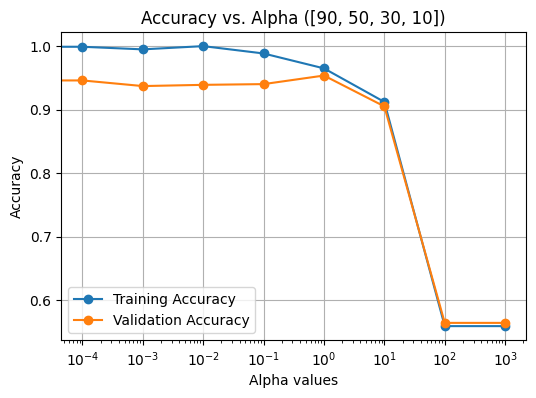

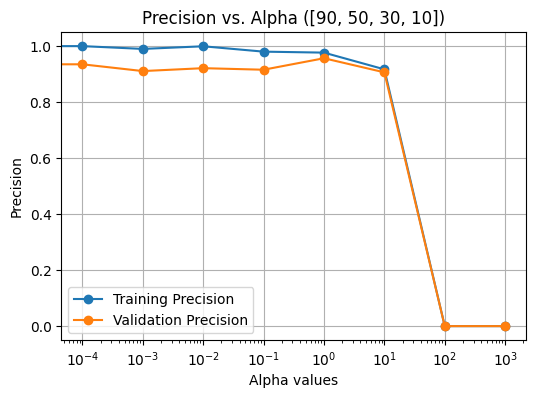

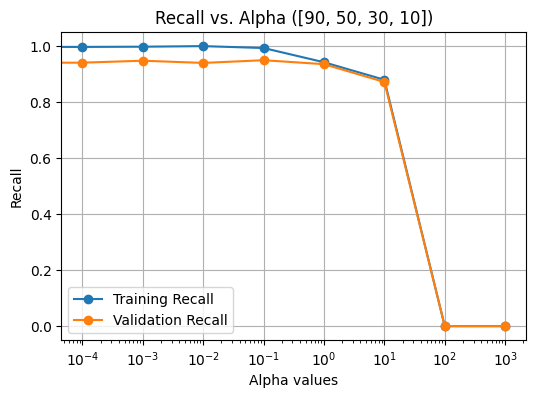

In [100]:
# plot accuracy
plt.figure(figsize=(6, 4))
plt.plot(alpha_vals_4, train_accuracy_list_nn4, marker='o', label='Training Accuracy')
plt.plot(alpha_vals_4, val_accuracy_list_nn4, marker='o', label='Validation Accuracy')
plt.xscale('log') # to space values out
plt.xlabel('Alpha values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Alpha ([90, 50, 30, 10])')
plt.grid()
plt.legend()
plt.show()

# plot precision
plt.figure(figsize=(6, 4))
plt.plot(alpha_vals_4, train_precision_list_nn4, marker='o', label='Training Precision')
plt.plot(alpha_vals_4, val_precision_list_nn4, marker='o', label='Validation Precision')
plt.xscale('log') # to space values out
plt.xlabel('Alpha values')
plt.ylabel('Precision')
plt.title('Precision vs. Alpha ([90, 50, 30, 10])')
plt.grid()
plt.legend()
plt.show()

# plot recall
plt.figure(figsize=(6, 4))
plt.plot(alpha_vals_4, train_recall_list_nn4, marker='o', label='Training Recall')
plt.plot(alpha_vals_4, val_recall_list_nn4, marker='o', label='Validation Recall')
plt.xscale('log') # to space values out
plt.xlabel('Alpha values')
plt.ylabel('Recall')
plt.title('Recall vs. Alpha ([90, 50, 30, 10])')
plt.grid()
plt.legend()
plt.show()

In [101]:
# recreate the best model and see how well the test data performs (X_test, y_test)

In [19]:
# baseline Logistic Regression with L2 Regulation 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

train_accuracy_list = []
val_accuracy_list = []
train_precision_list = []
val_precision_list = []
train_recall_list = []
val_recall_list = []

# c values (regularization)
c_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in c_vals:
    print('C Value: {0:}'.format(c))

    # logistic regression model
    base_lr = LogisticRegression(C=c, penalty='l2', solver='liblinear', max_iter=1000)
    base_lr.fit(X_train, y_train)

    # predict
    y_train_hat = base_lr.predict(X_train)
    y_val_hat = base_lr.predict(X_val)

    # accuracy
    train_accuracy = accuracy_score(y_train, y_train_hat)
    train_accuracy_list.append(train_accuracy)
    val_accuracy = accuracy_score(y_val, y_val_hat)
    val_accuracy_list.append(val_accuracy)

    print('Training Accuracy = {0:f}'.format(train_accuracy))
    print('Validation Accuracy = {0:f}'.format(val_accuracy))

    # precision
    train_precision = precision_score(y_train, y_train_hat, zero_division=0)
    train_precision_list.append(train_precision)
    val_precision = precision_score(y_val, y_val_hat, zero_division=0)
    val_precision_list.append(val_precision)

    print('Training Precision = {0:f}'.format(train_precision))
    print('Validation Precision = {0:f}'.format(val_precision))

    # recall
    train_recall = recall_score(y_train, y_train_hat)
    train_recall_list.append(train_recall)
    val_recall = recall_score(y_val, y_val_hat)
    val_recall_list.append(val_recall)

    print('Training Recall = {0:f}'.format(train_recall))
    print('Validation Recall = {0:f}'.format(val_recall))

C Value: 0.0001
Training Accuracy = 0.842974
Validation Accuracy = 0.836413
Training Precision = 0.817672
Validation Precision = 0.804836
Training Recall = 0.828125
Validation Recall = 0.824050
C Value: 0.001
Training Accuracy = 0.866121
Validation Accuracy = 0.858353
Training Precision = 0.857063
Validation Precision = 0.838509
Training Recall = 0.835337
Validation Recall = 0.835544
C Value: 0.01
Training Accuracy = 0.872281
Validation Accuracy = 0.866821
Training Precision = 0.868953
Validation Precision = 0.854562
Training Recall = 0.836101
Validation Recall = 0.836428
C Value: 0.1
Training Accuracy = 0.872233
Validation Accuracy = 0.866051
Training Precision = 0.869442
Validation Precision = 0.854941
Training Recall = 0.835337
Validation Recall = 0.833775
C Value: 1
Training Accuracy = 0.872185
Validation Accuracy = 0.866436
Training Precision = 0.869259
Validation Precision = 0.855717
Training Recall = 0.835446
Validation Recall = 0.833775
C Value: 10
Training Accuracy = 0.872185


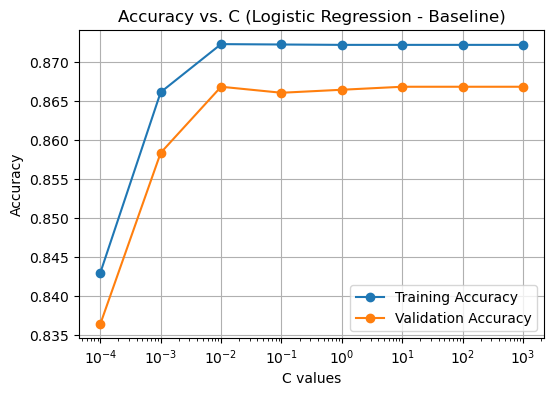

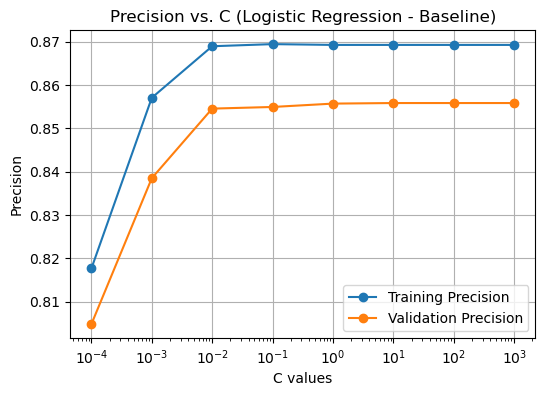

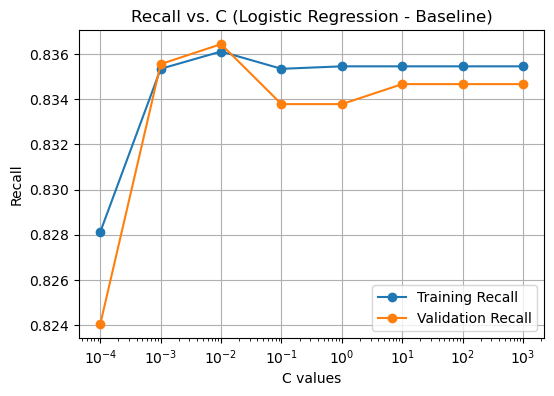

In [20]:
import matplotlib.pyplot as plt

# accuracy
plt.figure(figsize=(6, 4))
plt.plot(c_vals, train_accuracy_list, marker='o', label='Training Accuracy')
plt.plot(c_vals, val_accuracy_list, marker='o', label='Validation Accuracy')
plt.xscale('log')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C (Logistic Regression - Baseline)')
plt.grid()
plt.legend()
plt.show()

# precision
plt.figure(figsize=(6, 4))
plt.plot(c_vals, train_precision_list, marker='o', label='Training Precision')
plt.plot(c_vals, val_precision_list, marker='o', label='Validation Precision')
plt.xscale('log')
plt.xlabel('C values')
plt.ylabel('Precision')
plt.title('Precision vs. C (Logistic Regression - Baseline)')
plt.grid()
plt.legend()
plt.show()

# recall
plt.figure(figsize=(6, 4))
plt.plot(c_vals, train_recall_list, marker='o', label='Training Recall')
plt.plot(c_vals, val_recall_list, marker='o', label='Validation Recall')
plt.xscale('log')
plt.xlabel('C values')
plt.ylabel('Recall')
plt.title('Recall vs. C (Logistic Regression - Baseline)')
plt.grid()
plt.legend()
plt.show()


In [17]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# transformation 1: polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly.fit_transform(X)

# train/test split and scale
X_train_p2, X_val_p2, y_train_p2, y_val_p2 = train_test_split(X_poly2, y, test_size=0.2, random_state=42)

scaler_p2 = StandardScaler()
X_train_p2 = scaler_p2.fit_transform(X_train_p2)
X_val_p2 = scaler_p2.transform(X_val_p2)

# metric lists (renamed to keep clean)
train_accuracy_list_p2 = []
val_accuracy_list_p2 = []
train_precision_list_p2 = []
val_precision_list_p2 = []
train_recall_list_p2 = []
val_recall_list_p2 = []

c_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in c_vals:
    print('C Value: {0:}'.format(c))

    # logistic regression with poly features degree 2
    poly_lr = LogisticRegression(C=c, penalty='l2', solver='liblinear', max_iter=1000)
    poly_lr.fit(X_train_p2, y_train_p2)

    # predictions
    y_train_hat = poly_lr.predict(X_train_p2)
    y_val_hat = poly_lr.predict(X_val_p2)

    # accuracy
    train_accuracy = accuracy_score(y_train_p2, y_train_hat)
    train_accuracy_list_p2.append(train_accuracy)
    val_accuracy = accuracy_score(y_val_p2, y_val_hat)
    val_accuracy_list_p2.append(val_accuracy)

    print('Training Accuracy = {0:f}'.format(train_accuracy))
    print('Validation Accuracy = {0:f}'.format(val_accuracy))

    # precision
    train_precision = precision_score(y_train_p2, y_train_hat, zero_division=0)
    train_precision_list_p2.append(train_precision)
    val_precision = precision_score(y_val_p2, y_val_hat, zero_division=0)
    val_precision_list_p2.append(val_precision)

    print('Training Precision = {0:f}'.format(train_precision))
    print('Validation Precision = {0:f}'.format(val_precision))

    # recall
    train_recall = recall_score(y_train_p2, y_train_hat)
    train_recall_list_p2.append(train_recall)
    val_recall = recall_score(y_val_p2, y_val_hat)
    val_recall_list_p2.append(val_recall)

    print('Training Recall = {0:f}'.format(train_recall))
    print('Validation Recall = {0:f}'.format(val_recall))


C Value: 0.0001
Training Accuracy = 0.873869
Validation Accuracy = 0.866051
Training Precision = 0.862632
Validation Precision = 0.842662
Training Recall = 0.848776
Validation Recall = 0.849400
C Value: 0.001
Training Accuracy = 0.905823
Validation Accuracy = 0.896844
Training Precision = 0.907834
Validation Precision = 0.891017
Training Recall = 0.875000
Validation Recall = 0.868059
C Value: 0.01
Training Accuracy = 0.928393
Validation Accuracy = 0.919938
Training Precision = 0.935851
Validation Precision = 0.924572
Training Recall = 0.899038
Validation Recall = 0.887606
C Value: 0.1
Training Accuracy = 0.941097
Validation Accuracy = 0.933025
Training Precision = 0.946296
Validation Precision = 0.933485
Training Recall = 0.918378
Validation Recall = 0.910262
C Value: 1
Training Accuracy = 0.945332
Validation Accuracy = 0.933988
Training Precision = 0.948523
Validation Precision = 0.931674
Training Recall = 0.926136
Validation Recall = 0.914705
C Value: 10
Training Accuracy = 0.946006


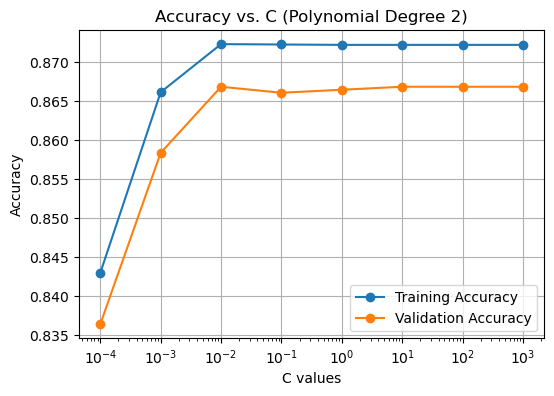

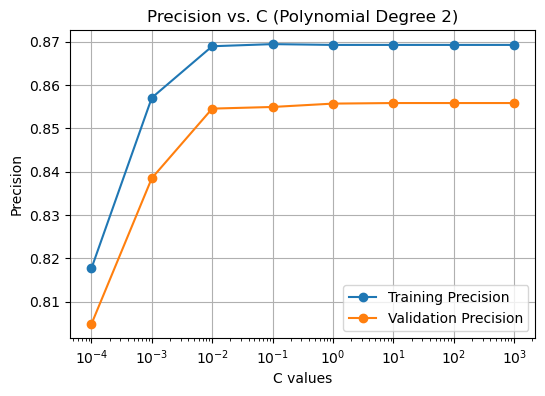

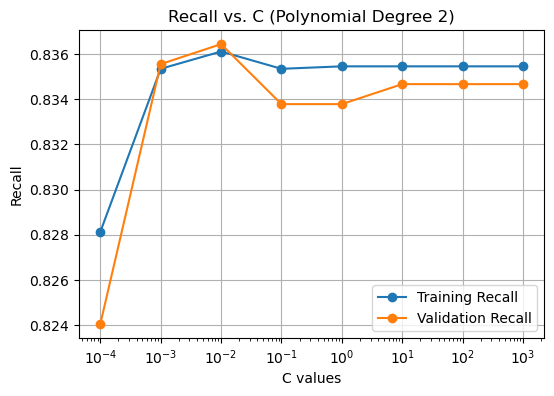

In [18]:
# accuracy
plt.figure(figsize=(6, 4))
plt.plot(c_vals, train_accuracy_list, marker='o', label='Training Accuracy')
plt.plot(c_vals, val_accuracy_list, marker='o', label='Validation Accuracy')
plt.xscale('log')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C (Polynomial Degree 2)')
plt.grid()
plt.legend()
plt.show()

# precision
plt.figure(figsize=(6, 4))
plt.plot(c_vals, train_precision_list, marker='o', label='Training Precision')
plt.plot(c_vals, val_precision_list, marker='o', label='Validation Precision')
plt.xscale('log')
plt.xlabel('C values')
plt.ylabel('Precision')
plt.title('Precision vs. C (Polynomial Degree 2)')
plt.grid()
plt.legend()
plt.show()

# recall
plt.figure(figsize=(6, 4))
plt.plot(c_vals, train_recall_list, marker='o', label='Training Recall')
plt.plot(c_vals, val_recall_list, marker='o', label='Validation Recall')
plt.xscale('log')
plt.xlabel('C values')
plt.ylabel('Recall')
plt.title('Recall vs. C (Polynomial Degree 2)')
plt.grid()
plt.legend()
plt.show()


In [ ]:
# transformation 2: polynomial features (degree 3)
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly3 = poly3.fit_transform(X)

X_train_p3, X_val_p3, y_train_p3, y_val_p3 = train_test_split(X_poly3, y, test_size=0.2, random_state=42)

scaler_p3 = StandardScaler()
X_train_p3 = scaler_p3.fit_transform(X_train_p3)
X_val_p3 = scaler_p3.transform(X_val_p3)

train_accuracy_list_p3 = []
val_accuracy_list_p3 = []
train_precision_list_p3 = []
val_precision_list_p3 = []
train_recall_list_p3 = []
val_recall_list_p3 = []

c_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for c in c_vals:
    print('C Value: {0:}'.format(c))

    # logistic regression with 3rd-degree polynomial features
    poly3_lr = LogisticRegression(C=c, penalty='l2', solver='liblinear', max_iter=1000)
    poly3_lr.fit(X_train_p3, y_train_p3)

    # predict
    y_train_hat = poly3_lr.predict(X_train_p3)
    y_val_hat = poly3_lr.predict(X_val_p3)

    # accuracy
    train_accuracy = accuracy_score(y_train_p3, y_train_hat)
    val_accuracy = accuracy_score(y_val_p3, y_val_hat)
    train_accuracy_list_p3.append(train_accuracy)
    val_accuracy_list_p3.append(val_accuracy)

    print('Training Accuracy = {0:f}'.format(train_accuracy))
    print('Validation Accuracy = {0:f}'.format(val_accuracy))

    # precision
    train_precision = precision_score(y_train_p3, y_train_hat, zero_division=0)
    val_precision = precision_score(y_val_p3, y_val_hat, zero_division=0)
    train_precision_list_p3.append(train_precision)
    val_precision_list_p3.append(val_precision)

    print('Training Precision = {0:f}'.format(train_precision))
    print('Validation Precision = {0:f}'.format(val_precision))

    # recall
    train_recall = recall_score(y_train_p3, y_train_hat)
    val_recall = recall_score(y_val_p3, y_val_hat)
    train_recall_list_p3.append(train_recall)
    val_recall_list_p3.append(val_recall)

    print('Training Recall = {0:f}'.format(train_recall))
    print('Validation Recall = {0:f}'.format(val_recall))


C Value: 0.0001
Training Accuracy = 0.907459
Validation Accuracy = 0.898768
Training Precision = 0.914650
Validation Precision = 0.899121
Training Recall = 0.871176
Validation Recall = 0.863172
C Value: 0.001
Training Accuracy = 0.929740
Validation Accuracy = 0.921671
Training Precision = 0.941561
Validation Precision = 0.930439
Training Recall = 0.896088
Validation Recall = 0.885384
C Value: 0.01
Training Accuracy = 0.945910
Validation Accuracy = 0.936875
Training Precision = 0.953354
Validation Precision = 0.940853
Training Recall = 0.922312
Validation Recall = 0.911595
C Value: 0.1
Training Accuracy = 0.959192
Validation Accuracy = 0.939184
Training Precision = 0.964637
Validation Precision = 0.939573
Training Recall = 0.941871
Validation Recall = 0.918703
C Value: 1
Training Accuracy = 0.970837
Validation Accuracy = 0.943610
Training Precision = 0.973410
Validation Precision = 0.938620
Training Recall = 0.960009
Validation Recall = 0.930697
C Value: 10
Training Accuracy = 0.981328


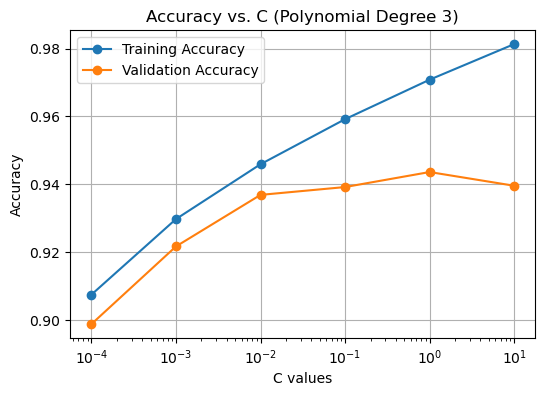

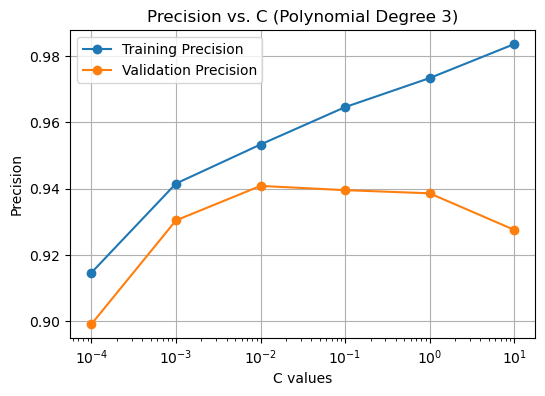

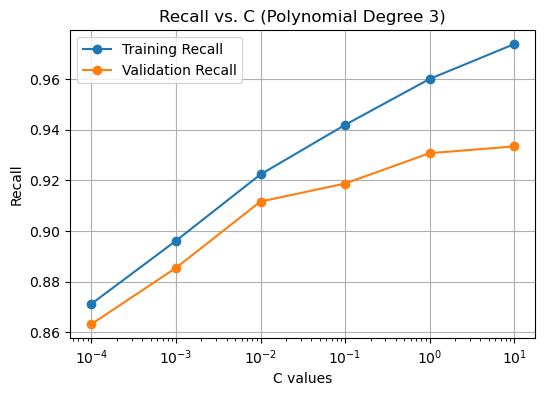

In [23]:
# accuracy
plt.figure(figsize=(6, 4))
plt.plot(c_vals, train_accuracy_list_p3, marker='o', label='Training Accuracy')
plt.plot(c_vals, val_accuracy_list_p3, marker='o', label='Validation Accuracy')
plt.xscale('log')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C (Polynomial Degree 3)')
plt.grid()
plt.legend()
plt.show()

# precision
plt.figure(figsize=(6, 4))
plt.plot(c_vals, train_precision_list_p3, marker='o', label='Training Precision')
plt.plot(c_vals, val_precision_list_p3, marker='o', label='Validation Precision')
plt.xscale('log')
plt.xlabel('C values')
plt.ylabel('Precision')
plt.title('Precision vs. C (Polynomial Degree 3)')
plt.grid()
plt.legend()
plt.show()

# recall
plt.figure(figsize=(6, 4))
plt.plot(c_vals, train_recall_list_p3, marker='o', label='Training Recall')
plt.plot(c_vals, val_recall_list_p3, marker='o', label='Validation Recall')
plt.xscale('log')
plt.xlabel('C values')
plt.ylabel('Recall')
plt.title('Recall vs. C (Polynomial Degree 3)')
plt.grid()
plt.legend()
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# feature selection: Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_kbest = selector.fit_transform(X, y)

# train/test split and scale
X_train_k, X_val_k, y_train_k, y_val_k = train_test_split(X_kbest, y, test_size=0.2, random_state=42)

scaler_k = StandardScaler()
X_train_k = scaler_k.fit_transform(X_train_k)
X_val_k = scaler_k.transform(X_val_k)

# metric lists
train_accuracy_list_k = []
val_accuracy_list_k = []
train_precision_list_k = []
val_precision_list_k = []
train_recall_list_k = []
val_recall_list_k = []

# Regularization values
c_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in c_vals:
    print('C Value: {0:}'.format(c))

    # logistic regression with selected features
    kbest_lr = LogisticRegression(C=c, penalty='l2', solver='liblinear', max_iter=1000)
    kbest_lr.fit(X_train_k, y_train_k)

    # predictions
    y_train_hat = kbest_lr.predict(X_train_k)
    y_val_hat = kbest_lr.predict(X_val_k)

    # accuracy
    train_accuracy = accuracy_score(y_train_k, y_train_hat)
    val_accuracy = accuracy_score(y_val_k, y_val_hat)
    train_accuracy_list_k.append(train_accuracy)
    val_accuracy_list_k.append(val_accuracy)

    print('Training Accuracy = {0:f}'.format(train_accuracy))
    print('Validation Accuracy = {0:f}'.format(val_accuracy))

    # precision
    train_precision = precision_score(y_train_k, y_train_hat, zero_division=0)
    val_precision = precision_score(y_val_k, y_val_hat, zero_division=0)
    train_precision_list_k.append(train_precision)
    val_precision_list_k.append(val_precision)

    print('Training Precision = {0:f}'.format(train_precision))
    print('Validation Precision = {0:f}'.format(val_precision))

    # recall
    train_recall = recall_score(y_train_k, y_train_hat)
    val_recall = recall_score(y_val_k, y_val_hat)
    train_recall_list_k.append(train_recall)
    val_recall_list_k.append(val_recall)

    print('Training Recall = {0:f}'.format(train_recall))
    print('Validation Recall = {0:f}'.format(val_recall))


C Value: 0.0001
Training Accuracy = 0.824976
Validation Accuracy = 0.823133
Training Precision = 0.795204
Validation Precision = 0.791339
Training Recall = 0.811626
Validation Recall = 0.803643
C Value: 0.001
Training Accuracy = 0.843648
Validation Accuracy = 0.837182
Training Precision = 0.829078
Validation Precision = 0.815447
Training Recall = 0.812500
Validation Recall = 0.806753
C Value: 0.01
Training Accuracy = 0.850962
Validation Accuracy = 0.839299
Training Precision = 0.840820
Validation Precision = 0.821526
Training Recall = 0.816106
Validation Recall = 0.803643
C Value: 0.1
Training Accuracy = 0.852117
Validation Accuracy = 0.839877
Training Precision = 0.843408
Validation Precision = 0.822940
Training Recall = 0.815669
Validation Recall = 0.803199
C Value: 1
Training Accuracy = 0.852214
Validation Accuracy = 0.839492
Training Precision = 0.843521
Validation Precision = 0.822485
Training Recall = 0.815778
Validation Recall = 0.802754
C Value: 10
Training Accuracy = 0.852214


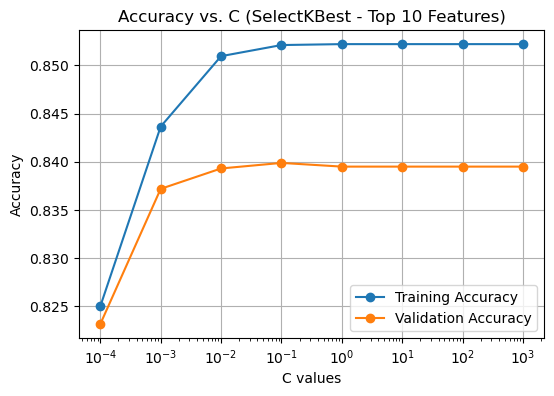

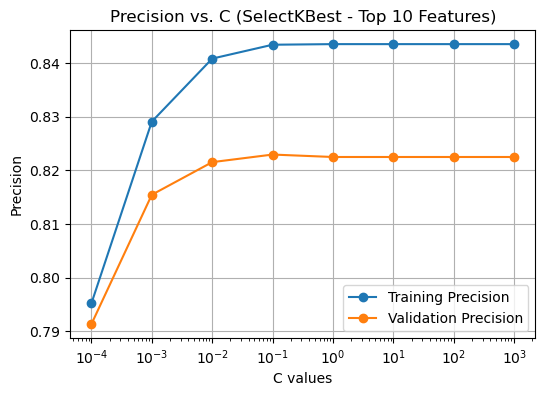

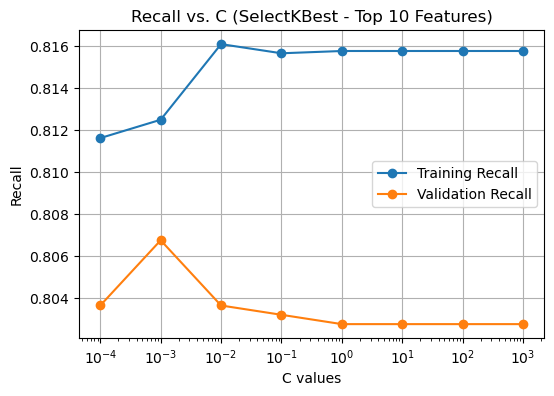

In [ ]:
# accuracy
plt.figure(figsize=(6, 4))
plt.plot(c_vals, train_accuracy_list_k, marker='o', label='Training Accuracy')
plt.plot(c_vals, val_accuracy_list_k, marker='o', label='Validation Accuracy')
plt.xscale('log')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C (SelectKBest - Top 10 Features)')
plt.grid()
plt.legend()
plt.show()

# precision
plt.figure(figsize=(6, 4))
plt.plot(c_vals, train_precision_list_k, marker='o', label='Training Precision')
plt.plot(c_vals, val_precision_list_k, marker='o', label='Validation Precision')
plt.xscale('log')
plt.xlabel('C values')
plt.ylabel('Precision')
plt.title('Precision vs. C (SelectKBest - Top 10 Features)')
plt.grid()
plt.legend()
plt.show()

# recall
plt.figure(figsize=(6, 4))
plt.plot(c_vals, train_recall_list_k, marker='o', label='Training Recall')
plt.plot(c_vals, val_recall_list_k, marker='o', label='Validation Recall')
plt.xscale('log')
plt.xlabel('C values')
plt.ylabel('Recall')
plt.title('Recall vs. C (SelectKBest - Top 10 Features)')
plt.grid()
plt.legend()
plt.show()


In [30]:
from sklearn.neural_network import MLPClassifier
# recreate the best model and see how well the test data performs (X_test, y_test)

# combine training and validation data
X_final = np.vstack((X_train, X_val))
y_final = np.concatenate((y_train, y_val))

print('Alpha Value: 0.1')

# neural network with two hidden layers + regularization alpha = 0.1
nn_best = MLPClassifier(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', alpha=0.1, max_iter=1000, random_state=42)

# train on full combined data
nn_best.fit(X_final, y_final)

# predict on test set
y_test_hat = nn_best.predict(X_test)

# accuracy 
test_accuracy = accuracy_score(y_test, y_test_hat)
print('Test Accuracy = {0:f}'.format(test_accuracy))

# precision
test_precision = precision_score(y_test, y_test_hat, zero_division=0)
print('Test Precision = {0:f}'.format(test_precision))

# recall
test_recall = recall_score(y_test, y_test_hat)
print('Test Recall = {0:f}'.format(test_recall))

Alpha Value: 0.1
Test Accuracy = 0.946112
Test Precision = 0.938283
Test Recall = 0.936607
